In [59]:
# 可以解决回归离散数据

# 利用pandas 进行数据的读取
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [60]:
dc_listings = pd.read_csv('./data/csv/test.csv')

In [61]:
dc_listings.head()

,Entry,Entry name,Protein names,Gene names,Length,Mass
0,A0A584,TVBK2_HUMAN,T cell receptor beta variable 11-2,TRBV11-2 TCRBV21S3A2N2T,115,"12,743"
1,Q9BXU3,TX13A_HUMAN,Testis-expressed protein 13A,TEX13A,409,"45,583"
2,Q15031,SYLM_HUMAN,"Probable leucine--tRNA ligase, mitochondrial (...",LARS2 KIAA0028,903,"101,976"
3,Q6PKC3,TXD11_HUMAN,Thioredoxin domain-containing protein 11 (EF-h...,TXNDC11 EFP1,985,"110,529"
4,P42681,TXK_HUMAN,Tyrosine-protein kinase TXK (EC 2.7.10.2) (Pro...,TXK PTK4 RLK,527,"61,258"


In [62]:
dc_listings = pd.read_csv('./data/risk.csv',dtype = {'column_name' : int})
dc_listings.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [63]:
features = ['Age','Smokes','Smokes (years)','Hormonal Contraceptives (years)','Dx:Cancer','Dx:HPV']
dc_listings = dc_listings[features]
print(dc_listings.shape)
dc_listings.head()

(858, 6)


,Age,Smokes,Smokes (years),Hormonal Contraceptives (years),Dx:Cancer,Dx:HPV
0,18,0.0,0.0,0.0,0,0
1,15,0.0,0.0,0.0,0,0
2,34,0.0,0.0,0.0,0,0
3,52,1.0,37.0,3.0,1,1
4,46,0.0,0.0,15.0,0,0


In [64]:
dc_listings.rename(columns={'Smokes (years)':'Smokeyear','Hormonal Contraceptives (years)':'HC',
                            'Dx:Cancer':'DC','Dx:HPV':'DHPV'}, inplace = True) 

In [65]:
dc_listings.head()
dc_listings.dtypes

Age           int64
Smokes       object
Smokeyear    object
HC           object
DC            int64
DHPV          int64
dtype: object

# 如果有一个人的年龄30，烟龄12，没有Cancer,预测其是否有Dx:HPV

In [66]:
# 没有Cancer 定义变量our_acc_value = 0
import numpy as np
our_acc_value = 0
dc_listings['distance'] = np.abs(dc_listings.DC - our_acc_value)
# dc_listings['distance'] = np.abs(int(dc_listings.Smokeyear) - our_acc_value)

# dc_listings['distance'] = np.abs(dc_listings.Smokeyear.astype(int) - our_acc_value)

# value_counts: 计算个数，sort_index： 按索引排序
dc_listings.distance.value_counts().sort_index()

0    840
1     18
Name: distance, dtype: int64

In [67]:
# dc_listings['Smokeyear'] = dc_listings.Smokeyear.astype(float)

In [68]:
list(dc_listings)

['Age', 'Smokes', 'Smokeyear', 'HC', 'DC', 'DHPV', 'distance']

In [69]:
dc_listings.head()

,Age,Smokes,Smokeyear,HC,DC,DHPV,distance
0,18,0.0,0.0,0.0,0,0,0
1,15,0.0,0.0,0.0,0,0,0
2,34,0.0,0.0,0.0,0,0,0
3,52,1.0,37.0,3.0,1,1,1
4,46,0.0,0.0,15.0,0,0,0


In [70]:
# 将排列好的数据打乱
# sample操作可以得到洗牌后的数据

dc_listings = dc_listings.sample(frac = 1,random_state = 0)
dc_listings = dc_listings.sort_values('distance')
dc_listings.DHPV.head(840)

144    0
614    0
641    0
195    0
191    0
536    0
164    0
106    0
16     0
778    0
540    0
646    0
329    0
498    0
747    0
405    0
640    0
93     0
433    0
83     0
848    0
667    0
414    0
480    0
853    0
160    0
818    0
580    0
282    0
348    0
      ..
356    0
466    0
467    0
584    0
532    0
783    0
52     0
308    0
412    0
78     0
665    0
198    0
367    0
644    0
499    0
573    0
21     0
395    0
457    0
553    0
250    0
243    0
638    0
35     0
81     0
159    0
482    0
687    0
109    1
792    0
Name: DHPV, Length: 840, dtype: int64

# 此时预测的是不准确的，因为该模型只用了Cancer的有无来判断DHPV

In [71]:
# 求前840个数据DHPV的平均值
mean_DHPV = dc_listings.DHPV.iloc[:840].mean()
mean_DHPV
# 0.002380952380952381:    可以以很大的概率推断，该人没有DHPV

0.002380952380952381

# 模型评估

首先指定好训练集和测试集

In [72]:
dc_listings.drop('distance',axis = 1)
train_df = dc_listings.copy().iloc[:636]
test_df = dc_listings.copy().iloc[636:]

基于单变量的预测

In [73]:
def predict_DHPV(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_8 = temp_df.DHPV.iloc[:840]
    predicted_DHPV = knn_8.mean()
    return(predicted_DHPV)

In [74]:
test_df.DC[:5]

793    0
318    0
303    0
627    0
208    0
Name: DC, dtype: int64

In [75]:
# apply () 函数： 对每一个样本都执行同样的操作
test_df['predicted_DHPV'] = test_df.DC.apply(predict_DHPV,feature_column = 'DC')

# 将预测的数据存进来：利用RMSE（ 均方根误差）进行评估模型的好坏

In [76]:
test_df['squared_error'] = (test_df['predicted_DHPV'] - test_df['DHPV'])**(2)
mse = test_df['squared_error'].mean()
rmse = mse ** (1/2)
rmse

0.2847473987257497

现在我们的得到的是对于一个变量模型的评估得分： 均方根误差越小越好

# 数据预处理

# 不同的变量的效果会不会有什么不同呢？

In [77]:
dc_listings.head()
dc_listings.dtypes

Age           int64
Smokes       object
Smokeyear    object
HC           object
DC            int64
DHPV          int64
distance      int64
dtype: object

没起作用/???????????????????

In [78]:
dc_listings = pd.read_csv('./data/risk.csv',dtype = {'column_name':int})
dc_listings.dtypes


Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [81]:
features = ['Age','Smokes','Smokes (years)','Hormonal Contraceptives (years)','Dx:Cancer','Dx:HPV']
dc_listings = dc_listings[features]
print(dc_listings.shape)
dc_listings.head()

(858, 6)


,Age,Smokes,Smokes (years),Hormonal Contraceptives (years),Dx:Cancer,Dx:HPV
0,18,0.0,0.0,0.0,0,0
1,15,0.0,0.0,0.0,0,0
2,34,0.0,0.0,0.0,0,0
3,52,1.0,37.0,3.0,1,1
4,46,0.0,0.0,15.0,0,0


In [126]:
dc_listings.rename(columns={'Smokes (years)':'Smokeyear','Hormonal Contraceptives (years)':'HC',
                            'Dx:Cancer':'DC','Dx:HPV':'DHPV'}, inplace = True) 
dc_listings.head()

,Age,Smokes,Smokeyear,HC,DC,DHPV
0,18,0.0,0.0,0.0,0,0
1,15,0.0,0.0,0.0,0,0
2,34,0.0,0.0,0.0,0,0
3,52,1.0,37.0,3.0,1,1
4,46,0.0,0.0,15.0,0,0


In [127]:
def predict_DHPV(new_listing_value,feature_column):
    temp_df = train_df
    temp_df['distance'] = np.abs(dc_listings[feature_column] - new_listing_value)
    temp_df = temp_df.sort_values('distance')
    knn_8 = temp_df.DHPV.iloc[:840]
    predicted_DHPV = knn_8.mean()
    return(predicted_DHPV)

In [128]:
# apply () 函数： 对每一个样本都执行同样的操作
test_df['predicted_DHPV'] = test_df.DC.apply(predict_DHPV,feature_column = 'DC')

print(test_df['predicted_DHPV'])
# apply () 函数： 对每一个样本都执行同样的操作
test_df['predicted_DHPV2'] = test_df.DC.apply(predict_DHPV,feature_column = 'Age')
print(test_df['predicted_DHPV2'])

793    0.0
318    0.0
303    0.0
627    0.0
208    0.0
302    0.0
51     0.0
90     0.0
542    0.0
22     0.0
647    0.0
218    0.0
104    0.0
634    0.0
382    0.0
205    0.0
506    0.0
190    0.0
361    0.0
568    0.0
495    0.0
194    0.0
397    0.0
730    0.0
481    0.0
436    0.0
402    0.0
413    0.0
268    0.0
161    0.0
      ... 
457    0.0
553    0.0
250    0.0
243    0.0
638    0.0
35     0.0
81     0.0
159    0.0
482    0.0
687    0.0
109    0.0
792    0.0
64     0.0
738    0.0
763    0.0
23     0.0
849    0.0
8      0.0
432    0.0
797    0.0
822    0.0
727    0.0
335    0.0
669    0.0
839    0.0
188    0.0
610    0.0
578    0.0
775    0.0
3      0.0
Name: predicted_DHPV, Length: 222, dtype: float64
793    0.0
318    0.0
303    0.0
627    0.0
208    0.0
302    0.0
51     0.0
90     0.0
542    0.0
22     0.0
647    0.0
218    0.0
104    0.0
634    0.0
382    0.0
205    0.0
506    0.0
190    0.0
361    0.0
568    0.0
495    0.0
194    0.0
397    0.0
730    0.0
481    0.0
436 

In [135]:
test_df['squared_error1'] = (test_df['predicted_DHPV2'] - test_df['DHPV'])**(2)
mse = test_df['squared_error1'].mean()
rmse = mse ** (1/2)
rmse

0.2847473987257497

In [132]:
test_df['squared_error2'] = (test_df['predicted_DHPV'] - test_df['DHPV'])**(2)
mse = test_df['squared_error2'].mean()
rmse = mse ** (1/2)
rmse

0.2847473987257497

In [133]:
for feature in ['Age','DC']:
    test_df['pradicted_DHPV'] = test_df[feature].apply(predict_DHPV,feature_column = feature)
    test_df['squared_error'] = (test_df['predicted_DHPV'] - test_df['DHPV'])**(2)
    mse = test_df['squared_error'].mean()
    rmse = mse**(1/2)
    
    # format: 函数，不用% 进行匹配
    print('RMSE for the {} column:{}'.format(feature,rmse))
    
    


RMSE for the Age column:0.2847473987257497
RMSE for the DC column:0.2847473987257497


# 怎么感觉不对劲啊？？？ 不应该啊？ 怎么会是一样的呢？？？

In [134]:
test_df['squared_error1'] = (test_df['predicted_DHPV'] - test_df['DHPV'])**(2)
mse = test_df['squared_error1'].mean()
rmse = mse**(1/2)
       # format: 函数，不用% 进行匹配
print('RMSE for the DC column:{}'.format(rmse))


test_df['squared_error2'] = (test_df['predicted_DHPV2'] - test_df['DHPV'])**(2)
mse = test_df['squared_error2'].mean()
rmse = mse**(1/2)
   # format: 函数，不用% 进行匹配
print('RMSE for the Age column:{}'.format(rmse))

RMSE for the DC column:0.2847473987257497
RMSE for the Age column:0.2847473987257497


多方证明就是一样的

# 特征数据标准化与归一化处理
笔记：
-  第一点：将数据进行压缩，均值u为0，标准差a为1：z = (x - u)/a,
    参数更新，对每一个特征的重要程度是一样的

# 归一化处理：
笔记：
- 第一点：0-1归一化，处理后的数据被压缩到0-1的区间上，这样做可以抑制离群值对结果的影响，
   
   公式：X = (X - Xmin)/(Xmax - Xmin)

# Sklearn 库与功能
笔记：
- 第一点：很重要的一个库，机器学习

In [141]:
dd = pd.read_csv('./data/risk.csv')

dd.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [142]:
dd.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# 转换数据类型

In [163]:
col = list(dd.columns)
dd[col] = dd[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
data = pd.DataFrame(dd,dtype='float')
dd.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [165]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/risk.csv',    # 读出数据集
                header = None,         # 用哪一行当做列名，自己定义
                usecols = [0,4,5])     # 返回一个子集，拿部分特征进行举例
df.columns = ['Age','Smoker','Smokeyear']
df.head()

,Age,Smoker,Smokeyear
0,Age,Smokes,Smokes (years)
1,18,0.0,0.0
2,15,0.0,0.0
3,34,0.0,0.0
4,52,1.0,37.0


# 想哭： 终于将类型给转换过来了： 感动^_^.......

In [167]:
# 找到列名，转化为列表
col = list(df.columns)


# 把所有列的类型都转化为数值型，出错的地方填入NaN，再把NaN的地方补0
df[col] = df[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
# 至此，object的列（列中存储的是string类型）转成了float
 
# 最后一步，把所有列都转化成float类型，done！
data = pd.DataFrame(df,dtype='float')
df.dtypes

Age          float64
Smoker       float64
Smokeyear    float64
dtype: object

在数据中，NSP和FSI衡量的标准应该是不同的，特征值之间的差异较大

In [182]:
#做数据的预处理 有两种方式：标准化，特征化
from sklearn import preprocessing

# 标准化方案
std_scale = preprocessing.StandardScaler().fit(df[['Smoker','Age']])
df_std = std_scale.transform(df[['Smoker','Age']])

# 归一化方案
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Smoker','Age']])
df_minmax = minmax_scale.transform(df[['Smoker','Age']])

In [183]:
print('Mean after standardization:\nSmoker = {:.2f},Age = {:.2f}'.format(df_std[:,0].mean(),df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nSmoker = {:.2f},Age = {:.2f}'.format(df_std[:,0].std(),df_std[:,1].std()))

Mean after standardization:
Smoker = 0.00,Age = 0.00

Standard deviation after standardization:
Smoker = 1.00,Age = 1.00


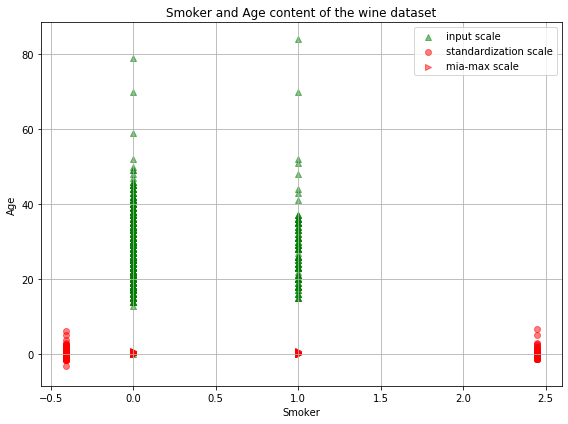

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def plot():
    plt.figure(figsize = (8,6))
    plt.scatter(df['Smoker'],df['Age'],color = 'g',label = 'input scale',
                alpha = 0.5,marker = '^')
    plt.scatter(df_std[:,0],df_std[:,1],color = 'r',label = 'standardization scale',
                alpha = 0.5,marker = 'o')
    
    plt.scatter(df_minmax[:,0],df_minmax[:,1],color = 'r',label = 'mia-max scale',
                alpha = 0.5,marker = '>')
    
    plt.title('Smoker and Age content of the wine dataset')
    plt.xlabel('Smoker')
    plt.ylabel('Age')
    plt.legend(loc = 'best')
    plt.grid()
    
    plt.tight_layout()
plot()

In [206]:
# fig,ax = plt.subplots(3,figsize = (6,14))

# for a,d,l in zip(range(len(ax)),
#             (df[['Smoker','Smokeyear']].values,df_std,df_minmax),
#             ('input scale',
#              'standardization scale',
#              'mia-max scale')
#             ):
#     for i,c in zip(range(1,4),('red','green','blue')):
#         ax[a].scatter(d[df['Class label'].values == i,0],
#                      d[df['Class label'].values == i,1],
#                      alpha = .5,
#                      color = c,
#                      label = 'Class %s' %i
#                      )
#     ax[a].set_title(l)
#     ax[a].set_xlabel('Smoker')
#     ax[a].set_ylabel('Smokeyear')
#     ax[a].legend(loc = 'best')
#     ax[a].grid()
    
# plt.tight_layout()

# plt.show()

# 综合利用所有数据进行那个测试

In [7]:
dc_listings = pd.read_csv('./data/risk.csv')
dc_listings.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [16]:
#  导入读取数据的包pandas
import pandas as pd
# 导入将数据做标准化预处理的包 from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# 采用rename() 函数，给属性列重新命名： 用字典的形式，并且指明inplace = True
dc_listings.rename(columns={'Smokes (years)':'Smokeyear','Dx:Cancer':'DC',
                            'Dx:HPV':'DHPV'}, inplace = True) 

# 取出，想要查看的特征值对目标值的影响的列名，作为一个数组
feature = ['Age','Smokeyear','DC','DHPV']

# 取出数据中的特征值列
dc_listings = dc_listings[feature]


# 找到列名，转化为列表
col = list(dc_listings.columns)


# 把所有列的类型都转化为数值型，出错的地方填入NaN，再把NaN的地方补0
dc_listings[col] = dc_listings[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
# 至此，object的列（列中存储的是string类型）转成了float
 
# 最后一步，把所有列都转化成float类型，done！
dc_listings = pd.DataFrame(dc_listings,dtype='float')

#
dc_listings['Smokeyear'] = dc_listings.Smokeyear.astype(float)



#dc_listings['Smokeyear'] = dc_listings.Smokeyear.str.replace('\?','0.0').astype(float)
#AttributeError: Can only use .str accessor with string values, which use 
                                      #  np.object_ dtype in pandas

# dropna(): 函数去掉缺失值
dc_listings = dc_listings.dropna()

# 转换为标准化数据
dc_listings[feature] = StandardScaler().fit_transform(dc_listings[feature])
# normalized_listings = dc_listings
print(dc_listings.shape)
# normalized_listings.head()
dc_listings.head()


# 就会得到各个属性的取值范围差不多的属性列

(858, 4)


,Age,Smokeyear,DC,DHPV
0,-1.038563,-0.295999,-0.146385,-0.146385
1,-1.391796,-0.295999,-0.146385,-0.146385
2,0.845342,-0.295999,-0.146385,-0.146385
3,2.964736,8.821219,6.831301,6.831301
4,2.258271,-0.295999,-0.146385,-0.146385


# 还有一些问题，明天再改吧

# 上面这个非常重要，一定要记住，